## Mallet-TM : 
### Extract Topic Model with LdaMallet from KCC News and CIS test data

In [1]:
# -*- coding: utf-8 -*-
"""
Input: "KCC Data/CkipNewsCisTest-KccDict2020.txt"
Output: "KCC Data/NewsCisTest-KccDict2020-MalletNum20.txt"

@author: johnson
"""
from gensim import corpora, models, utils
from gensim.models import LdaModel
from gensim.models import CoherenceModel

### read data from txt file, and tokenize words, clean-up text

In [2]:
fList = []
with open("Ly Data/yang_ws.txt","r", encoding='utf-8-sig') as files:
     for file in files:
        #simple_preprocess: tokenize,去除標點 - gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15)
        fList.append(list(utils.simple_preprocess(file, deacc=True, min_len=2,)))
print("fList[:1] = ", fList[:1])
print("------------------------------")

fList[:1] =  [['委員', '質詢', '委員', '列席', '官員', '同仁', '政府', '目的', '解決', '業務報告', '裡面', '提到', '土壤', '下水道', '污染', '防治', '水土', '整治', '環保署', '業務', '帶來', '澎湖', '民眾', '心聲', '環保署', '關心', '澎湖縣', '資源', '有限', '總共', '水庫', '水庫', '劃定', '保護區', '大城', '水源水質保護區', '地方', '政府', '接受', '中央', '補助', '大城', '設置', '垃圾處理', '專區', '新建', '垃圾', '分選場', '廚餘', '處置', '不當', '公民', '參與', '反對', '聲音', '居民', '抗議', '環保署', '補助', '地方', '補助', '經費', '能力', '介入', '空間', '環保署', '署長', '答復', '業務', '單位', '委員', '進一步', '環保署環境督察總隊', '總隊長', '答復', '總隊長', '清郎', '委員', '澎湖縣', '垃圾', '分選場', '環保署', '補助', '經費', '設置', '委員', '選址', '有沒有', '參與', '總隊長', '清郎', '地方', '垃圾處理', '專區', '設置', '分選場', '空污', '工程', '人員', '協助', '操作', '防制', '經費', '協助', '委員', '改善', '澎湖縣', '環保局', '辦法', '改善', '惡臭', '持續', '發生', '能不能', '開罰', '總隊長', '清郎', '稽查', '委員', '總隊長', '清郎', '稽查', '委員', '坦白', '選址', '公民', '參與', '先天', '不良', '後續', '空污', '防制', '心力', '澎湖縣', '需要', '改善', '工程', '環保署', '給予', '經費', '補助', '事實', '設施', '選址', '之初', '強化', '公民', '參與', '大城', '居民', '講法', '道理', '資源', '保護區', '環保署', '澎湖縣政府', '總

### creat dictionary for corpus

In [3]:
# creat a unique id for each word segment
dict = corpora.Dictionary(list(fList))
print("dict = ", dict)
print("------------------------------")

dict =  Dictionary(12505 unique tokens: ['unfccc', '一再', '一點', '上臺', '下水道']...)
------------------------------


### creat corpus need for Topic Modeling

In [4]:
# creat mapping matrix of [word_id, word_frequency] for each word segment
corpus = [dict.doc2bow(text) for text in fList]   
print("corpus[:1] = ", corpus[:1])  
print("================================================")

print("print lists of [word:frequency]")
[[print((dict[id], freq)) for id,freq in cp] for cp in corpus[:1]]
print("======================================================")

corpus[:1] =  [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 3), (22, 1), (23, 3), (24, 1), (25, 1), (26, 3), (27, 1), (28, 1), (29, 11), (30, 5), (31, 1), (32, 3), (33, 1), (34, 1), (35, 3), (36, 1), (37, 9), (38, 1), (39, 1), (40, 1), (41, 3), (42, 1), (43, 1), (44, 1), (45, 4), (46, 1), (47, 1), (48, 2), (49, 4), (50, 1), (51, 1), (52, 1), (53, 5), (54, 2), (55, 1), (56, 1), (57, 4), (58, 1), (59, 27), (60, 4), (61, 1), (62, 1), (63, 1), (64, 5), (65, 1), (66, 1), (67, 4), (68, 2), (69, 7), (70, 1), (71, 2), (72, 3), (73, 1), (74, 43), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 2), (82, 2), (83, 1), (84, 2), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 2), (91, 1), (92, 1), (93, 1), (94, 2), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 3), (101, 1), (102, 1), (103, 1), (104, 1), (105, 2), (106, 2), (107, 1), (108, 2), (

### building the Topic Model from MALLET
#### enviroment setting for Mallet LDA: https://programminghistorian.org/en/lessons/topic-modeling-and-mallet#installing-mallet

In [5]:
mallet_path = "/users/twcty/Desktop/mallet-2.0.8/bin/mallet"
ldamal = models.wrappers.LdaMallet(mallet_path, corpus=corpus, id2word=dict, num_topics=20)
output = open("Ly Data/yang_ws.txt", 'w', encoding='utf-8-sig')

#print(ldamal.show_topics(formatted=False))
# 列出最重要的前若干个主题
lsTM = ldamal.show_topics(num_topics=20, num_words=20, log=False, formatted=False)
for tupleTM in lsTM:
        str1 = "".join(str(x) for x in tupleTM)
        #print("type(str1) = ", type(str1))
        str1 += "\n"
        print("strTM = ", str1)
        output.write(str1)
output.close()
 
#  print("------------------------------")
#  print("Perplexity = ", ldamal.log_perplexity(corpus))

print("------------------------------")
cm = models.CoherenceModel(model=ldamal, texts=list(fList), dictionary= dict, coherence= 'c_v')
coher_lda = cm.get_coherence()
print("\n Coherence Score: ", coher_lda)


strTM =  0[('委員', 0.07069246067618876), ('相關', 0.015548725366118243), ('發電', 0.013559934912312421), ('目前', 0.013017537515819924), ('能源', 0.012113541854999096), ('台電', 0.011751943590670765), ('再生', 0.009943952269029109), ('文生', 0.008859157476044115), ('機組', 0.00867835834387995), ('包括', 0.007955161815223287), ('臺灣', 0.007593563550894956), ('代理', 0.007593563550894956), ('開發', 0.0072319652865666245), ('經濟部', 0.0072319652865666245), ('完成', 0.007051166154402459), ('事業', 0.007051166154402459), ('減少', 0.007051166154402459), ('電廠', 0.006689567890074128), ('影響', 0.006508768757909962), ('申請', 0.006147170493581631)]

strTM =  1[('部長', 0.18527774622287857), ('時中', 0.06577303192093605), ('委員', 0.04328069976144496), ('澎湖', 0.029308190389639895), ('丙煌', 0.026695444734749517), ('本席', 0.015222083380665682), ('衛福部', 0.014767692831989095), ('老人', 0.012268544814267862), ('人力', 0.011359763716914687), ('長照', 0.01056458025673066), ('辦法', 0.01056458025673066), ('據點', 0.010450982619561512), ('關懷', 0.01011018970


 Coherence Score:  0.4308666921602722


### Finding the optimal number of topics

In [6]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    # global mallet_path, dict
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dict)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        coher = coherencemodel.get_coherence()
        print("Num_topics: ", num_topics, " Coherence Score= ", coher)
    return model_list, coherence_values

In [7]:
lim=36; sta=3; ste=3;
model_list, coherence_values = compute_coherence_values(dictionary=dict, corpus=corpus, texts=list(fList), limit=lim, start=sta, step=ste)

Num_topics:  3  Coherence Score=  0.350050329214777
Num_topics:  6  Coherence Score=  0.4525640848832118
Num_topics:  9  Coherence Score=  0.4334887553966054
Num_topics:  12  Coherence Score=  0.4589455839783852
Num_topics:  15  Coherence Score=  0.4113951234455919
Num_topics:  18  Coherence Score=  0.4431413509217373
Num_topics:  21  Coherence Score=  0.4449885084301614
Num_topics:  24  Coherence Score=  0.441635131147871
Num_topics:  27  Coherence Score=  0.4124266535183833
Num_topics:  30  Coherence Score=  0.423495916275331
Num_topics:  33  Coherence Score=  0.41518055563989975


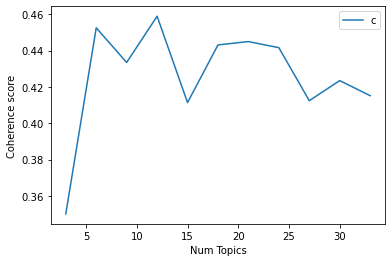

In [8]:
# Show graph
import matplotlib.pyplot as plt

limit=lim; start=sta; step=ste;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [9]:
# Print the coherence scores
optNum = 0
maxCV = 0
for m, cv in zip(x, coherence_values):
    # maxCV = lambda cv, maxCV: cv if cv > maxCV else maxCV
    if cv > maxCV:
        optNum = m
        maxCV = cv 
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
print("Optimal Topic Num =", optNum, " Highest Value =", maxCV)

Num Topics = 3  has Coherence Value of 0.3501
Num Topics = 6  has Coherence Value of 0.4526
Num Topics = 9  has Coherence Value of 0.4335
Num Topics = 12  has Coherence Value of 0.4589
Num Topics = 15  has Coherence Value of 0.4114
Num Topics = 18  has Coherence Value of 0.4431
Num Topics = 21  has Coherence Value of 0.445
Num Topics = 24  has Coherence Value of 0.4416
Num Topics = 27  has Coherence Value of 0.4124
Num Topics = 30  has Coherence Value of 0.4235
Num Topics = 33  has Coherence Value of 0.4152
Optimal Topic Num = 12  Highest Value = 0.4589455839783852


###  Select the model and print the topics

In [10]:
from pprint import pprint

optimal_model = model_list[5]
# model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=25))

[(0,
  '0.131*"次長" + 0.079*"委員" + 0.029*"研究" + 0.027*"瑞元" + 0.011*"審查" + 0.011*"負擔" '
  '+ 0.010*"目前" + 0.010*"這樣子" + 0.010*"補助" + 0.009*"政府" + 0.008*"衛福部" + '
  '0.008*"給付" + 0.007*"辦法" + 0.007*"健保" + 0.007*"討論" + 0.006*"本來" + 0.006*"國內" '
  '+ 0.006*"委外" + 0.006*"調整" + 0.006*"國人" + 0.006*"列席" + 0.006*"臺灣" + '
  '0.006*"機構" + 0.006*"請問" + 0.006*"角度"'),
 (1,
  '0.057*"醫療" + 0.054*"醫院" + 0.032*"醫師" + 0.026*"委員" + 0.024*"中心" + 0.022*"澎湖" '
  '+ 0.021*"醫學" + 0.018*"轉診" + 0.017*"地區" + 0.015*"偏鄉" + 0.014*"人力" + '
  '0.014*"離島" + 0.013*"醫生" + 0.012*"制度" + 0.011*"分級" + 0.010*"病患" + 0.010*"病人" '
  '+ 0.010*"衛福部" + 0.009*"目前" + 0.009*"服務" + 0.008*"區域" + 0.008*"支援" + '
  '0.008*"資源" + 0.008*"民眾" + 0.008*"診所"'),
 (2,
  '0.093*"委員" + 0.035*"局長" + 0.026*"申請" + 0.024*"工作" + 0.017*"五湖" + 0.016*"相關" '
  '+ 0.014*"目前" + 0.011*"給付" + 0.011*"勞保" + 0.010*"投保" + 0.009*"認定" + '
  '0.008*"疾病" + 0.008*"職災" + 0.008*"職業" + 0.007*"不好" + 0.007*"研究" + 0.007*"紓困" '
  '+ 0.007*"照顧" + 0.007*"輔導" + 0.006*"辦法" + 0.006*

### Finding the dominant topic in each sentence

In [11]:
import pandas as pd

# Finding the dominant topic in each sentence
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamal, corpus=corpus, texts=list(fList))

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,12.0,0.3945,"署長, 委員, 應元, 垃圾, 澎湖, 環保署, 地方, 提出, 本席, 環保","[委員, 質詢, 委員, 列席, 官員, 同仁, 政府, 目的, 解決, 業務報告, 裡面,..."
1,1,5.0,0.3442,"委員, 研究, 國彥, 計畫, 本席, 廠商, 目前, 處長, 特別, 報告","[委員, 列席, 官員, 同仁, 劣質油, 發生, 食用油, 回收, 利用, 關係, 請問,..."
2,2,13.0,0.7135,"委員, 政府, 給付, 基金, 部長, 負擔, 衛福部, 財務, 編列, 丙煌","[委員, 列席, 官員, 同仁, 請教, 法務部, 次長, 不兩, 陳英鈐, 教授, 理論,..."
3,3,3.0,0.4586,"部長, 委員, 雄文, 勞動部, 勞工, 工作, 芳煜, 工時, 局長, 雇主","[委員, 發言, 委員, 列席, 官員, 同仁, 審議, 好幾, 法案, 楊玉欣, 委員, ..."
4,4,13.0,0.6203,"委員, 政府, 給付, 基金, 部長, 負擔, 衛福部, 財務, 編列, 丙煌","[委員, 列席, 官員, 同仁, 討論, 外籍, 學生, 陸生, 強制, 納保, 保費, 分..."
5,5,6.0,0.4224,"委員, 署長, 檢驗, 秀梅, 進口, 食品, 郁美, 藥品, 管理, 英偉","[委員, 列席, 官員, 同仁, 請教, 關務署, 署長, 發生, 劣質油, 事件, 強冠,..."
6,6,13.0,0.3724,"委員, 政府, 給付, 基金, 部長, 負擔, 衛福部, 財務, 編列, 丙煌","[委員, 發言, 委員, 列席, 官員, 同仁, 次長, 劉建國, 委員, 談起, 臺灣, ..."
7,7,14.0,0.3203,"離島, 委員, 觀光, 目前, 機場, 航空, 發生, 罷工, 交通部, 臺灣","[委員, 委員, 雪生, 委員, 聯合, 質詢, 詢答, 時間, 分鐘, 委員, 行政院, ..."
8,8,13.0,0.4557,"委員, 政府, 給付, 基金, 部長, 負擔, 衛福部, 財務, 編列, 丙煌","[委員, 質詢, 委員, 列席, 官員, 同仁, 部長, 昨天, 報紙, 報導, 有關於, ..."
9,9,2.0,0.6548,"院長, 離島, 金門, 委員, 澎湖, 馬祖, 雪生, 政府, 人事, 發展","[委員, 行政院, 院長, 部會, 首長, 同仁, 本席, 澎湖, 離島, 加給, 院長, ..."


### Find the most representative document for each topic

In [12]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()
print("------------------------------")
sent_topics_sorteddf_mallet[:10]

------------------------------


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.6482,"委員, 相關, 發電, 目前, 能源, 台電, 再生, 文生, 機組, 包括","[委員, 委員, 署長, 討論, 國營, 事業, 勞檢, 職安署, 統計, 國營, 事業, ..."
1,1.0,0.5979,"部長, 時中, 委員, 澎湖, 丙煌, 本席, 衛福部, 老人, 人力, 辦法","[委員, 列席, 官員, 同仁, 部長, 目前, 照顧, 服務員, 缺口, 超過, 需求, ..."
2,2.0,0.7129,"院長, 離島, 金門, 委員, 澎湖, 馬祖, 雪生, 政府, 人事, 發展","[委員, 行政院, 院長, 部會, 首長, 同仁, 台灣, 地區, 政府, 軍公教, 人員,..."
3,3.0,0.7043,"部長, 委員, 雄文, 勞動部, 勞工, 工作, 芳煜, 工時, 局長, 雇主","[委員, 列席, 官員, 同仁, 討論, 工時, 工作者, 全職化, 本席, 工時, 工作者..."
4,4.0,0.6592,"委員, 人員, 工作, 司長, 人力, 專業, 社工, 通報, 社會, 強制","[委員, 發言, 委員, 列席, 官員, 同仁, 討論, 藥事法, 條文, 修正, 草案, ..."
5,5.0,0.6705,"委員, 研究, 國彥, 計畫, 本席, 廠商, 目前, 處長, 特別, 報告","[委員, 列席, 官員, 同仁, 臺灣, 腸病毒, 疫情, 肆虐, 研發, 腸病毒, 疫苗,..."
6,6.0,0.6909,"委員, 署長, 檢驗, 秀梅, 進口, 食品, 郁美, 藥品, 管理, 英偉","[委員, 列席, 官員, 同仁, 請教, 部長, 最近, 因應, 藥品, 賦形劑, 原料, ..."
7,7.0,0.6084,"醫療, 醫院, 醫師, 中心, 委員, 澎湖, 醫學, 轉診, 地區, 偏鄉","[委員, 列席, 官員, 同仁, 署長, 去年, 推動, 落實, 分級, 醫療, 雙向, 轉..."
8,8.0,0.4950,"次長, 委員, 瑞元, 目前, 需要, 衛福部, 慧娟, 辦法, 事實, 啟功","[委員, 列席, 官員, 同仁, 落實, 老人福利, 照顧, 東西, 老人福利, 機構, 健..."
9,9.0,0.5287,"委員, 預算, 基金, 離島, 計畫, 地方, 經費, 政府, 建設, 提到","[委員, 雪生, 行政院, 院長, 部會, 首長, 同仁, 離島建設條例, 實施, 行政院,..."


###  Showing topic distribution across documents

In [13]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,12.0,"署長, 委員, 應元, 垃圾, 澎湖, 環保署, 地方, 提出, 本席, 環保",9.0,0.0347
1.0,5.0,"委員, 研究, 國彥, 計畫, 本席, 廠商, 目前, 處長, 特別, 報告",20.0,0.0772
2.0,13.0,"委員, 政府, 給付, 基金, 部長, 負擔, 衛福部, 財務, 編列, 丙煌",9.0,0.0347
3.0,3.0,"部長, 委員, 雄文, 勞動部, 勞工, 工作, 芳煜, 工時, 局長, 雇主",23.0,0.0888
4.0,13.0,"委員, 政府, 給付, 基金, 部長, 負擔, 衛福部, 財務, 編列, 丙煌",14.0,0.0541
...,...,...,...,...
254.0,19.0,"委員, 副主任委員, 目前, 討論, 司長, 因素, 金城, 農委會, 吉仲, 時間",NaN,NaN
255.0,12.0,"署長, 委員, 應元, 垃圾, 澎湖, 環保署, 地方, 提出, 本席, 環保",NaN,NaN
256.0,1.0,"部長, 時中, 委員, 澎湖, 丙煌, 本席, 衛福部, 老人, 人力, 辦法",NaN,NaN
257.0,1.0,"部長, 時中, 委員, 澎湖, 丙煌, 本席, 衛福部, 老人, 人力, 辦法",NaN,NaN
